In [1]:
import pandas as pd
import os 
from pathlib import Path


In [28]:
pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 10.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
from pathlib import Path
import pandas as pd

path = Path('/work/CenaNoink/')
nomes_base_arquivos = ['savedrecs30', 'savedrecs31', 'savedrecs32']
lista_de_dfs = []

if path.is_dir():
    print(f"Processando arquivos com base na lista fornecida em: {path}")

    for nome_base_da_lista in nomes_base_arquivos:
        arquivo_encontrado_nesta_iteracao = False
        for item in path.iterdir():
            if item.is_file() and item.suffix.lower() == '.xls' and item.stem == nome_base_da_lista:
                print(f"  Encontrado arquivo Excel: {item.name} (para a entrada '{nome_base_da_lista}' na lista)")
                try:
                    df_individual = pd.read_excel(item)
                    lista_de_dfs.append(df_individual)
                    print(f"    Lido e adicionado à lista: {item.name}")
                    arquivo_encontrado_nesta_iteracao = True
                    break
                except Exception as e:
                    print(f"Erro ao ler o arquivo {item.name}: {e}")
                    break
        
        if not arquivo_encontrado_nesta_iteracao:
            print(f"  Nenhum arquivo .xls correspondente a '{nome_base_da_lista}' foi encontrado no diretório.")

    if lista_de_dfs:
        print("\nConcatenando todos os DataFrames lidos...")
        df_final = pd.concat(lista_de_dfs, ignore_index=True)

        print("\n--- DataFrame Final Criado ---")
        print("Primeiras 5 linhas:")
        print(df_final.head())
        print("\nInformações do DataFrame Final:")
        df_final.info()
        print(f"\nTotal de linhas no DataFrame final: {len(df_final)}")
    else:
        print("\nNenhum arquivo Excel válido foi lido e adicionado à lista.")

else:
    print(f"Erro: O caminho inicial '{path}' não existe ou não é um diretório válido.")

Processando arquivos com base na lista fornecida em: /work/CenaNoink
  Encontrado arquivo Excel: savedrecs30.xls (para a entrada 'savedrecs30' na lista)
    Lido e adicionado à lista: savedrecs30.xls
  Encontrado arquivo Excel: savedrecs31.xls (para a entrada 'savedrecs31' na lista)
    Lido e adicionado à lista: savedrecs31.xls
  Encontrado arquivo Excel: savedrecs32.xls (para a entrada 'savedrecs32' na lista)
    Lido e adicionado à lista: savedrecs32.xls

Concatenando todos os DataFrames lidos...

--- DataFrame Final Criado ---
Primeiras 5 linhas:
  Publication Type                                            Authors  \
0                J          Hernández-Rodríguez, P; López-Honorato, E   
1                J                Jae, UH; Park, BG; An, GS; Choi, SC   
2                J                 Ismail, RA; Zaidan, SA; Kadhim, RM   
3                J  Jia, ZF; Li, HQ; Zhao, Y; Frazer, L; Qian, BS;...   
4                J  Jiang, CH; Liu, SB; Lian, QH; Zhao, J; Ding, W...   

   B

In [37]:
df_final['Publication Type']

0       J
1       J
2       J
3       J
4       J
       ..
2995    J
2996    J
2997    J
2998    J
2999    J
Name: Publication Type, Length: 3000, dtype: object

In [40]:
df_final['Open Access Designations']

0                                          NaN
1                                          NaN
2                                       hybrid
3                                          NaN
4                                          NaN
                         ...                  
2995           Green Accepted, Green Submitted
2996    Green Submitted, Green Published, gold
2997                                       NaN
2998                                       NaN
2999                                       NaN
Name: Open Access Designations, Length: 3000, dtype: object

<Axes: ylabel='Document Type'>

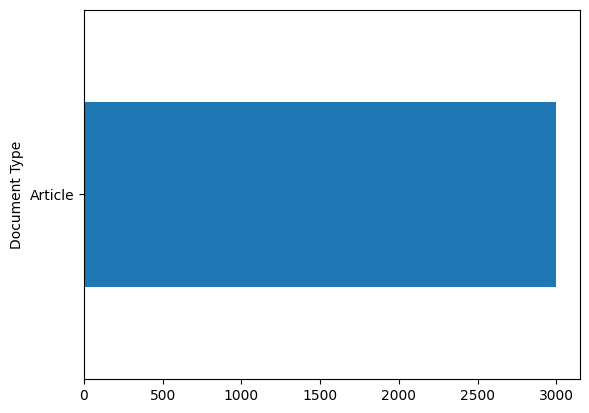

In [43]:
agrupado1 =df_final.groupby(['Document Type']).size()
agrupado1.plot.barh()

<Axes: ylabel='Open Access Designations'>

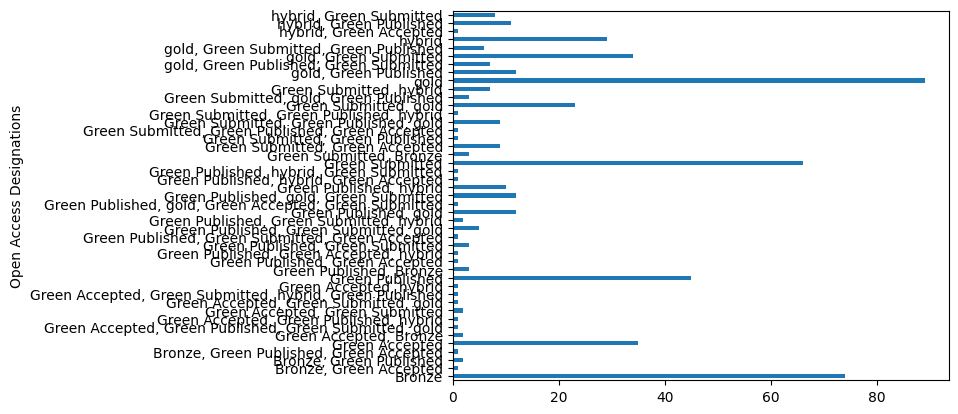

In [44]:
agrupado1 =df_final.groupby(['Open Access Designations']).size()
agrupado1.plot.barh()

In [45]:
df_final['Open Access Designations'].unique()

array([nan, 'hybrid', 'hybrid, Green Published', 'Bronze', 'gold',
       'Green Published, Bronze', 'Green Published', 'Green Accepted',
       'Green Published, hybrid', 'Green Submitted',
       'Green Submitted, gold', 'Green Published, gold, Green Submitted',
       'gold, Green Published', 'Green Submitted, Bronze',
       'Green Submitted, hybrid', 'Green Accepted, hybrid',
       'Green Submitted, Green Accepted', 'Green Accepted, Bronze',
       'Green Accepted, Green Submitted, hybrid, Green Published',
       'gold, Green Published, Green Submitted', 'Green Published, gold',
       'Green Accepted, Green Published, Green Submitted, gold',
       'gold, Green Submitted, Green Published',
       'Green Published, Green Submitted, hybrid',
       'Green Published, hybrid, Green Submitted',
       'Bronze, Green Accepted', 'Bronze, Green Published',
       'Green Published, Green Accepted',
       'Green Submitted, Green Published',
       'Green Published, Green Accepted, hybri

In [46]:
limite = 0.7
ds = df_final.loc[:, df_final.isnull().mean() <= limite]
ds.head()

,Publication Type,Authors,Author Full Names,Article Title,Source Title,Language,Document Type,Author Keywords,Keywords Plus,Abstract,...,DOI,DOI Link,Number of Pages,WoS Categories,Web of Science Index,Research Areas,IDS Number,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Hernández-Rodríguez, P; López-Honorato, E","Hernandez-Rodriguez, Pedro; Lopez-Honorato, Eddie",Polymer derived SiC environmental barrier coat...,CERAMICS INTERNATIONAL,English,Article,Polycarbosilane; Silicon carbide; Coating; Fil...,SILICON-CARBIDE; CARBOTHERMAL REDUCTION; MECHA...,Surfaces with superwetting capabilities can be...,...,10.1016/j.ceramint.2017.05.326,0.0,7,"Materials Science, Ceramics",Science Citation Index Expanded (SCI-EXPANDED),Materials Science,FA0WT,2025-04-23,WOS:000405158100087,0
1,J,"Jae, UH; Park, BG; An, GS; Choi, SC","Hur, Jae Uk; Park, Bong Geun; An, Gye Seok; Ch...",Fabrication of a high solid loading carbon bla...,JOURNAL OF CERAMIC PROCESSING RESEARCH,English,Article,Carbon black; High solid loading slurry; Dispe...,COLLOIDAL ALUMINA PARTICLES; INFILTRATION; COM...,The effect of amphiphilic fatty acids on the d...,...,NaN,NaN,6,"Materials Science, Ceramics",Science Citation Index Expanded (SCI-EXPANDED),Materials Science,GA2TF,2025-04-23,WOS:000428177200012,0
2,J,"Ismail, RA; Zaidan, SA; Kadhim, RM","Ismail, Raid A.; Zaidan, Shihab A.; Kadhim, Ra...",Preparation and characterization of aluminum o...,APPLIED NANOSCIENCE,English,Article,Al2O3; Nanoparticles; Laser ablation; Laser fl...,THIN-FILMS; OPTICAL-PROPERTIES; SOLAR-CELLS; G...,"In this study, we have prepared aluminum oxide...",...,10.1007/s13204-017-0580-0,0.0,11,Nanoscience & Nanotechnology,Science Citation Index Expanded (SCI-EXPANDED),Science & Technology - Other Topics,FQ7BO,2025-04-23,WOS:000418518000014,0
3,J,"Jia, ZF; Li, HQ; Zhao, Y; Frazer, L; Qian, BS;...","Jia, Zhengfeng; Li, Haoqi; Zhao, Yao; Frazer, ...",Electrical and mechanical properties of poly(d...,JOURNAL OF MATERIALS SCIENCE,English,Article,NaN,REDUCTION,Surface oxidation is frequently encountered in...,...,10.1007/s10853-017-1307-z,0.0,10,"Materials Science, Multidisciplinary",Science Citation Index Expanded (SCI-EXPANDED),Materials Science,FA2XY,2025-04-23,WOS:000405306300041,0
4,J,"Jiang, CH; Liu, SB; Lian, QH; Zhao, J; Ding, W...","Jiang, Chunhai; Liu, Shangbiao; Lian, Qinghuan...",Nitrogen-doped carbon-coated hierarchical Li4T...,CERAMICS INTERNATIONAL,English,Article,Li4Ti5O12; Li-ion batteries; Dual phase anode;...,HIGH-RATE PERFORMANCE; RATE LITHIUM STORAGE; A...,Nitrogen-doped carbon-coated Li4Ti5O12-TiO2 (L...,...,10.1016/j.ceramint.2017.05.341,0.0,7,"Materials Science, Ceramics",Science Citation Index Expanded (SCI-EXPANDED),Materials Science,FA0WT,2025-04-23,WOS:000405158100096,0


In [50]:
termos = ['nano', 'paint', 'coating', 'film', 'finish']
padrao = '|'.join(termos)

In [53]:
filtro = ds['Article Title'].str.contains(padrao, case=False, na=False) | \
         ds['Abstract'].str.contains(padrao, case=False, na=False)

In [56]:
df_final_filtrado = df_final[filtro]

In [59]:
df_final_filtrado.to_csv('artigos_filtrados1.csv', index=False)

In [62]:
at = pd.read_csv('artigos_filtrados1.csv')
at

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Hernández-Rodríguez, P; López-Honorato, E",NaN,NaN,NaN,"Hernandez-Rodriguez, Pedro; Lopez-Honorato, Eddie",NaN,NaN,Polymer derived SiC environmental barrier coat...,CERAMICS INTERNATIONAL,...,Science Citation Index Expanded (SCI-EXPANDED),Materials Science,FA0WT,NaN,NaN,NaN,NaN,2025-04-23,WOS:000405158100087,0
1,J,"Ismail, RA; Zaidan, SA; Kadhim, RM",NaN,NaN,NaN,"Ismail, Raid A.; Zaidan, Shihab A.; Kadhim, Ra...",NaN,NaN,Preparation and characterization of aluminum o...,APPLIED NANOSCIENCE,...,Science Citation Index Expanded (SCI-EXPANDED),Science & Technology - Other Topics,FQ7BO,NaN,hybrid,NaN,NaN,2025-04-23,WOS:000418518000014,0
2,J,"Jia, ZF; Li, HQ; Zhao, Y; Frazer, L; Qian, BS;...",NaN,NaN,NaN,"Jia, Zhengfeng; Li, Haoqi; Zhao, Yao; Frazer, ...",NaN,NaN,Electrical and mechanical properties of poly(d...,JOURNAL OF MATERIALS SCIENCE,...,Science Citation Index Expanded (SCI-EXPANDED),Materials Science,FA2XY,NaN,NaN,NaN,NaN,2025-04-23,WOS:000405306300041,0
3,J,"Kalantari, E; Naghib, SM; Naimi-Jamal, MR; Moz...",NaN,NaN,NaN,"Kalantari, Erfan; Naghib, Seyed Morteza; Naimi...",NaN,NaN,Green solvent-based sol-gel synthesis of monti...,JOURNAL OF SOL-GEL SCIENCE AND TECHNOLOGY,...,Science Citation Index Expanded (SCI-EXPANDED),Materials Science,FH7CZ,NaN,NaN,NaN,NaN,2025-04-23,WOS:000411341300011,0
4,J,"Karunaratne, MSA; Jepson, MAE; Simms, NJ; Nich...",NaN,NaN,NaN,"Karunaratne, M. S. A.; Jepson, M. A. E.; Simms...",NaN,NaN,Modelling of microstructural evolution in mult...,JOURNAL OF MATERIALS SCIENCE,...,Science Citation Index Expanded (SCI-EXPANDED),Materials Science,FB8LX,32025049.0,"hybrid, Green Published",NaN,NaN,2025-04-23,WOS:000406391600038,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,J,"Tang, SJ; Vilmann, AS; Saftoiu, A; Wang, WM; S...",NaN,NaN,NaN,"Tang, Shou-jiang; Vilmann, Andreas S.; Saftoiu...",NaN,NaN,EUS Needle Identification Comparison and Evalu...,GASTROINTESTINAL ENDOSCOPY,...,Science Citation Index Expanded (SCI-EXPANDED),Gastroenterology & Hepatology,DU5DY,26873530.0,"Green Accepted, Green Submitted",NaN,NaN,2025-04-23,WOS:000382233600006,0
2756,J,"Shioga, PHT; Binder, C; Hammes, G; Klein, AN; ...",NaN,NaN,NaN,"Teshima Shioga, Pedro Henrique; Binder, Cristi...",NaN,NaN,Effects of Different Plasma Nitrided Layers on...,MATERIALS RESEARCH-IBERO-AMERICAN JOURNAL OF M...,...,Science Citation Index Expanded (SCI-EXPANDED),Materials Science,DZ1UI,NaN,"Green Submitted, Green Published, gold",NaN,NaN,2025-04-23,WOS:000385626000031,0
2757,J,"Tian, ZL; Zheng, LY; Li, ZJ; Li, JL; Wang, JY",NaN,NaN,NaN,"Tian, Zhilin; Zheng, Liya; Li, Zhaojin; Li, Ji...",NaN,NaN,Exploration of the low thermal conductivities ...,JOURNAL OF THE EUROPEAN CERAMIC SOCIETY,...,Science Citation Index Expanded (SCI-EXPANDED),Materials Science,DN1EC,NaN,NaN,NaN,NaN,2025-04-23,WOS:000376808100021,0
2758,J,"Triki, A; Arnold, V",NaN,NaN,NaN,"Triki, Anis; Arnold, Vicky",NaN,NaN,Getting Caught Sugar Coating'': The Behavioral...,JOURNAL OF EMERGING TECHNOLOGIES IN ACCOUNTING,...,Emerging Sources Citation Index (ESCI),Business & Economics,FA6AG,NaN,NaN,NaN,NaN,2025-04-23,WOS:000405525100011,0


<Axes: xlabel='Language'>

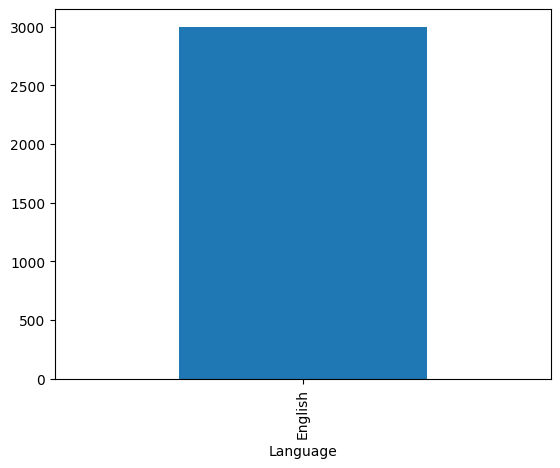

In [65]:
agru = ds.groupby(['Language']).size()
agru.plot.bar()

<Axes: xlabel='Publication Year'>

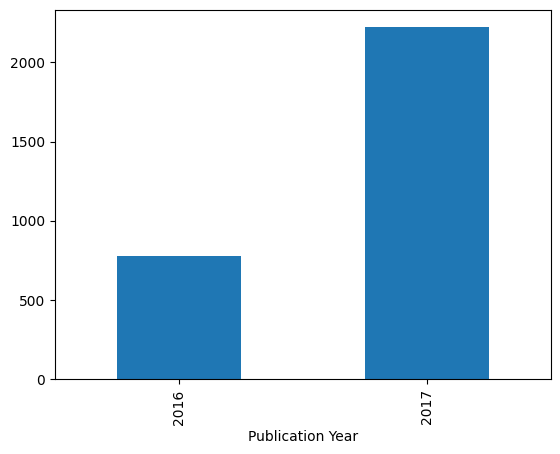

In [68]:
agru = ds.groupby(['Publication Year']).size()
agru.plot.bar()

In [74]:
import requests
import time
import pandas as pd

# Carregando o DataFrame a partir do arquivo CSV que foi gerado anteriormente
df = pd.read_csv('artigos_filtrados1.csv')

# Função para consultar a API do Unpaywall
def verificar_open_access(doi, email='alandelonsrocha@gmail.com'):
    url = f"https://api.unpaywall.org/v2/{doi}?email={email}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            return data.get("is_oa"), data.get("oa_status")  # True/False e tipo (gold, green, etc.)
        else:
            return None, None
    except:
        return None, None

# Aplicar a função em cada linha
df['is_oa'] = None
df['oa_status'] = None

for idx, row in df.iterrows():
    doi = row['DOI']
    if pd.notnull(doi):
        is_oa, oa_status = verificar_open_access(doi)
        df.at[idx, 'is_oa'] = is_oa
        df.at[idx, 'oa_status'] = oa_status
        time.sleep(1)  # Respeitar limite de 1 request por segundo da API gratuita

# Salvar o resultado
df.to_csv('resultado_com_oa38.csv', index=False)

In [77]:
res = pd.read_csv('resultado_com_oa38.csv')
res.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record,is_oa,oa_status
0,J,"Hernández-Rodríguez, P; López-Honorato, E",NaN,NaN,NaN,"Hernandez-Rodriguez, Pedro; Lopez-Honorato, Eddie",NaN,NaN,Polymer derived SiC environmental barrier coat...,CERAMICS INTERNATIONAL,...,FA0WT,NaN,NaN,NaN,NaN,2025-04-23,WOS:000405158100087,0,False,closed
1,J,"Ismail, RA; Zaidan, SA; Kadhim, RM",NaN,NaN,NaN,"Ismail, Raid A.; Zaidan, Shihab A.; Kadhim, Ra...",NaN,NaN,Preparation and characterization of aluminum o...,APPLIED NANOSCIENCE,...,FQ7BO,NaN,hybrid,NaN,NaN,2025-04-23,WOS:000418518000014,0,True,hybrid
2,J,"Jia, ZF; Li, HQ; Zhao, Y; Frazer, L; Qian, BS;...",NaN,NaN,NaN,"Jia, Zhengfeng; Li, Haoqi; Zhao, Yao; Frazer, ...",NaN,NaN,Electrical and mechanical properties of poly(d...,JOURNAL OF MATERIALS SCIENCE,...,FA2XY,NaN,NaN,NaN,NaN,2025-04-23,WOS:000405306300041,0,False,closed
3,J,"Kalantari, E; Naghib, SM; Naimi-Jamal, MR; Moz...",NaN,NaN,NaN,"Kalantari, Erfan; Naghib, Seyed Morteza; Naimi...",NaN,NaN,Green solvent-based sol-gel synthesis of monti...,JOURNAL OF SOL-GEL SCIENCE AND TECHNOLOGY,...,FH7CZ,NaN,NaN,NaN,NaN,2025-04-23,WOS:000411341300011,0,False,closed
4,J,"Karunaratne, MSA; Jepson, MAE; Simms, NJ; Nich...",NaN,NaN,NaN,"Karunaratne, M. S. A.; Jepson, M. A. E.; Simms...",NaN,NaN,Modelling of microstructural evolution in mult...,JOURNAL OF MATERIALS SCIENCE,...,FB8LX,32025049.0,"hybrid, Green Published",NaN,NaN,2025-04-23,WOS:000406391600038,0,True,hybrid


<Axes: xlabel='oa_status'>

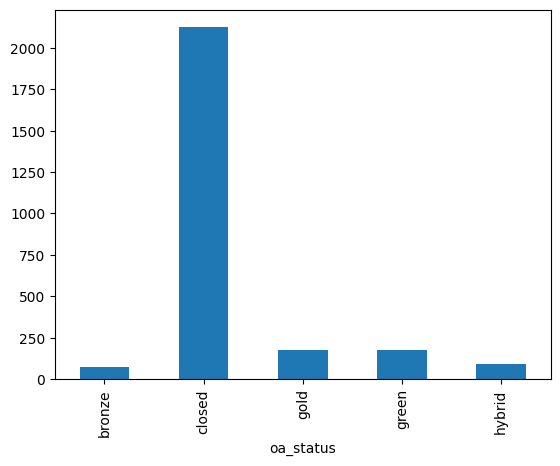

In [83]:
agru = res.groupby(["oa_status"]).size()
agru.plot.bar()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d35fdc8b-8543-45dc-ae25-3ba609dd01b9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>